## Tutorial of RAD toolkit

This tutorial introduces how to utilize the main APIs through a simulated dataset:
* `compress_module`: integrate gene module knowledge to reduce noise
* `estimate_number`: estimate the number of cell populations automatically
* `estimate_clones`: utilize core RAD algorithm to unmix the cell populations accurately and robustly
* `estimate_marker`: estimate other biomarkers of cell populations given bulk marker data

In [1]:
from gen_sim_data import gen_sim_data
from rad import compress_module, estimate_number, estimate_clones, estimate_marker
from utils import evaluate_accuracy

In [2]:
__author__ = "Yifeng Tao"

We first generate a simulated dataset `B \in R_{+}^{2048 \times 100}` for analysis, where we have 100 bulk samples and 2048 genes.
Each bulk sample is a combination of 3 cell populations.
Each 32 genes belongs to a module and coexpress, which lead to 64 modules.
The bulk sample also contains noise.

We know the ground truth `Cgt` and `Fgt`, the gene module knowledge.
Our aim is to recover the component matrix `C`, fraction matrix `F` from them, 
such that `C * F ~= B`

In [3]:
Cgt, Fgt, B, module = gen_sim_data()

### compress_module

We first compress the bulk gene expression into bulk module expression

In [4]:
B_M = compress_module(B, module)

### estimate_number

Notice that we do not know the number of components `k`, Therefore, we will estimate it.
This step can take a long time, here use `max_comp=4` and `n_splits=2` to reduce time.

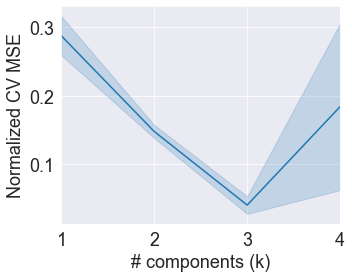

In [5]:
k = estimate_number(B_M, max_comp=4, n_splits=2)#10, 20

As you can see, when `k=3`, the cross-validation error reaches its minimum. We will use the estimated `k=3` for the following analysis. Actually, for this simulated dataset, the ground truth number of clones is indeed 3.

### estimate_clones

Now given both compressed bulk data `B_M` and estimated number of cell populations `k`, we utilize the core RAD agorithm to unmix cell component `C_M` and fractions `F`.

In [6]:
C_M, F = estimate_clones(B_M, k, verbose=False)

### estimate_marker

Finally, if we have the bulk data of other biomarkers `B_P`, e.g., pathway values, we can estimate the `C_P` from `B_P` and `F`.
But here we are interested in the biomarker of original gene expressions `B`.

In [7]:
C = estimate_marker(B, F)

We evaluate the estimation accuray

r2f=0.994, mse=0.000


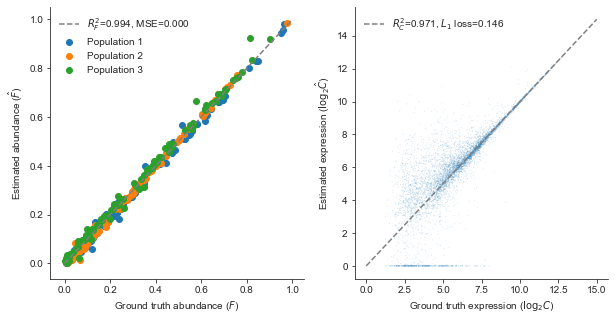

In [8]:
r2f, mse, r2c, l1 = evaluate_accuracy(C, F, Cgt, Fgt, plotfig=True)
print("r2f=%.3f, mse=%.3f"%(r2f, mse))